**External factors and guest segmentation**
- Investigate the influence of external factors such as seasonality or local events on segment size and behavior.
- Suggest operational adjustments (e.g., staffing, promotions) for high-impact periods.

**EDA of themepark_weather_holiday dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("themepark_weather_holiday.csv")
df

,themepark,country,month,avg_crowd_level,avg_temp,avg_precipitation,avg_humidity,public_holiday,school_holiday
0,Familypark,Austria,Mar,37,5.5,52.0,71,0,0
1,Familypark,Austria,Apr,25,10.9,55.0,65,2,10
2,Familypark,Austria,May,39,15.3,84.0,67,2,2
3,Familypark,Austria,Jun,52,19.3,85.0,65,3,6
4,Familypark,Austria,Jul,61,21.1,91.0,64,0,0
...,...,...,...,...,...,...,...,...,...
636,Six Flags Over Texas,USA,Aug,29,30.2,55.0,51,0,31
637,Six Flags Over Texas,USA,Sep,46,26.2,66.0,55,1,1
638,Six Flags Over Texas,USA,Oct,72,20.3,97.0,58,1,2
639,Six Flags Over Texas,USA,Nov,52,14.2,89.0,63,2,4


In [5]:
# Standardise avg_temp using z-score normalisation since different countries have different temperature ranges

def standardise_temperature(df, temp_column="avg_temp", country_column="country"):
    df["standardised_temp"] = df.groupby(country_column)[temp_column].transform(
        lambda x: (x - x.mean()) / x.std()
    )
    return df

# Apply function to dataset
df = standardise_temperature(df, temp_column="avg_temp", country_column="country")

In [6]:
df

,themepark,country,month,avg_crowd_level,avg_temp,avg_precipitation,avg_humidity,public_holiday,school_holiday,standardised_temp
0,Familypark,Austria,Mar,37,5.5,52.0,71,0,0,-1.419373
1,Familypark,Austria,Apr,25,10.9,55.0,65,2,10,-0.510525
2,Familypark,Austria,May,39,15.3,84.0,67,2,2,0.230017
3,Familypark,Austria,Jun,52,19.3,85.0,65,3,6,0.903237
4,Familypark,Austria,Jul,61,21.1,91.0,64,0,0,1.206187
...,...,...,...,...,...,...,...,...,...,...
636,Six Flags Over Texas,USA,Aug,29,30.2,55.0,51,0,31,1.600244
637,Six Flags Over Texas,USA,Sep,46,26.2,66.0,55,1,1,1.119090
638,Six Flags Over Texas,USA,Oct,72,20.3,97.0,58,1,2,0.409388
639,Six Flags Over Texas,USA,Nov,52,14.2,89.0,63,2,4,-0.324371


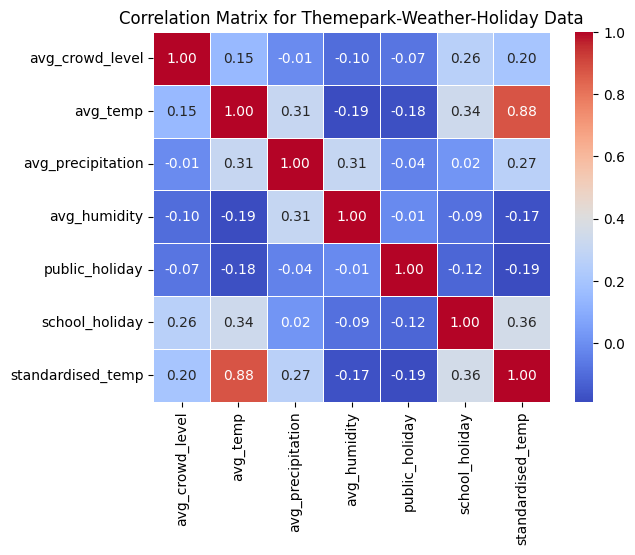

In [7]:
# Remove first 3 columns
df_corr = df.copy()
df_corr = df_corr.iloc[:, 3:]
df_corr.head()

# Correlation plot
def plot_cor_matrix(df, title= "Correlation Matrix for Themepark-Weather-Holiday Data"):
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

plot_cor_matrix(df_corr)

### Analysis
#### - school_holiday had the strongest positive correlation with avg_crowd_level among all variables.
#### - standardised_temp also had a positive correlation with avg_crowd_level, but it was weaker than school_holiday's correlation.
#### - avg_precipitation, avg_humidity, and public_holiday had weak negative correlations with avg_crowd_level.
#### - The strong positive correlation between avg_temp and standardised_temp shows that the z-score normalisation process was able to preserve the original temperature trends.

## Construct Multiple Linear Regression Model

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ["standardised_temp", "avg_precipitation", "avg_humidity", "public_holiday", "school_holiday"]
target = "avg_crowd_level"

# Split dataset into test and training data
X_train, X_test, y_train, y_test = train_test_split(df_corr[features], df_corr[target], test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

# Print coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)


Mean Absolute Error: 10.10871940846373
Mean Squared Error: 170.96270969432854
R-Squared Score: -0.025351847161629637
Model Coefficients: [ 1.89131889 -0.01509983 -0.07207922 -0.76777206  0.31515373]
Model Intercept: 52.564343386721575


## Construct Model using Random Forest (RF)

In [9]:
from sklearn.ensemble import RandomForestRegressor


# Split dataset into test and training data
X_train, X_test, y_train, y_test = train_test_split(df_corr[features], df_corr[target], test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Mean Absolute Error:",  mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

# Print feature importance
feature_importance = pd.DataFrame({"Feature": features, "Importance": rf_model.feature_importances_}).sort_values(by="Importance", ascending=False)
print("Feature Importance:")
print(feature_importance)


Mean Absolute Error: 8.15052956195398
Mean Squared Error: 130.161437378734
R-Squared Score: 0.21935449850953614
Feature Importance:
             Feature  Importance
0  standardised_temp    0.292494
2       avg_humidity    0.224951
1  avg_precipitation    0.207094
4     school_holiday    0.198187
3     public_holiday    0.077274


### Analysis

#### The mean squared error for the random forest model is lower than that of the multiple linear regression model, suggesting that the RF model is better at predicting average crowd level.

#### The negative r-squared score for the linear regression model indicates that it fails to capture meaningful relationships in the data. This suggests that the relationship between the predictors and crowd levels is highly non-linear, making linear regression an unsuitable choice.

#### While the random forest model achieves a positive r-squared score, its relatively low value implies that it only captures a limited portion of the variance in crowd levels.

#### Clustering guests into distinct segments may provide deeper insights into the different factors influencing their decision to visit theme parks. Identifying these visitor groups can enable a more targeted analysis and lead to better-informed recommendations.

In [10]:
df_2 = pd.read_csv("dsa3101_clustered_data.csv")
df_2.head()

,cluster,q1,q2_1,q2_2,q3,q4_1,q4_2,q4_3,q4_4,q5_1,...,q18_6,q19_1,q19_2,q19_3,q19_4,q19_5,q19_6,q19_7,q19_8,q20
0,1.0,Solo Traveller,13 To 20 Years Old,Male,Local,5 To 10 Minutes,10 To 20 Minutes,5 To 10 Minutes,10 To 20 Minutes,20,...,"Crowd Management, Staff Helpfulness And Effici...",5,3,5,5,4,4,2,3,NaN
1,2.0,Visiting With Friends,13 To 20 Years Old,Female,Local,20 To 30 Minutes,5 To 10 Minutes,10 To 20 Minutes,10 To 20 Minutes,70,...,"Crowd Management, Availability Of Shelters And...",5,4,4,5,5,2,1,2,"Easy to navigate, and the themes are beautiful..."
2,2.0,Visiting With Friends,21 To 34 Years Old,Female,Local,20 To 30 Minutes,30 To 60 Minutes,10 To 20 Minutes,5 To 10 Minutes,50,...,I Am Satisfied 👍,4,5,5,5,5,4,4,4,NaN
3,2.0,Visiting With Friends,21 To 34 Years Old,Female,Local,10 To 20 Minutes,5 To 10 Minutes,5 To 10 Minutes,5 To 10 Minutes,15,...,"Crowd Management, Availability Of Shelters And...",4,5,4,5,5,4,3,3,"Not too crowded on weekdays, plenty of space t..."
4,1.0,Solo Traveller,21 To 34 Years Old,Male,Local,20 To 30 Minutes,I Do Not Visit,I Do Not Visit,I Do Not Visit,45,...,Availability Of Shelters And Rest Areas,3,4,5,5,5,1,1,1,NaN


# **EDA of clusters**

In [11]:
# extract relevant columns
data = df_2[['q1', 'q2_1','q3', 'q6', 'q7', 'q8', 'q10', 'q12', 'cluster']]
data.info()
data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       505 non-null    object 
 1   q2_1     505 non-null    object 
 2   q3       505 non-null    object 
 3   q6       505 non-null    object 
 4   q7       505 non-null    object 
 5   q8       505 non-null    object 
 6   q10      505 non-null    object 
 7   q12      505 non-null    object 
 8   cluster  500 non-null    float64
dtypes: float64(1), object(8)
memory usage: 35.6+ KB


,0
q1,0
q2_1,0
q3,0
q6,0
q7,0
q8,0
q10,0
q12,0
cluster,5


In [12]:
data = data.dropna(subset=['cluster'])
data.info()
data.isna().sum()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       500 non-null    object 
 1   q2_1     500 non-null    object 
 2   q3       500 non-null    object 
 3   q6       500 non-null    object 
 4   q7       500 non-null    object 
 5   q8       500 non-null    object 
 6   q10      500 non-null    object 
 7   q12      500 non-null    object 
 8   cluster  500 non-null    float64
dtypes: float64(1), object(8)
memory usage: 39.1+ KB


,q1,q2_1,q3,q6,q7,q8,q10,q12,cluster
0,Solo Traveller,13 To 20 Years Old,Local,"Performances, Roadshows, Eateries And Restaura...","Weather Conditions, Wait Times For Rides, Attr...",None Of The Above,Weekdays,Spontaneous Exploration,1.0
1,Visiting With Friends,13 To 20 Years Old,Local,"Roller Coasters, Water Rides, 3D and 4D Experi...","Weather Conditions, Holiday Seasons, Special E...",Halloween Horror Night,"Weekdays, Weekends, School Holidays",Spontaneous Exploration,2.0
2,Visiting With Friends,21 To 34 Years Old,Local,"Roller Coasters, Water Rides, 3D and 4D Experi...","Wait Times For Rides, Attraction Variety, Cost...",None Of The Above,"Weekends, School Holidays",Following Shortest Queue,2.0
3,Visiting With Friends,21 To 34 Years Old,Local,"Roller Coasters, Water Rides","Wait Times For Rides, Attraction Variety, Cost...",Halloween Horror Night,School Holidays,Following Shortest Queue,2.0
4,Solo Traveller,21 To 34 Years Old,Local,Roller Coasters,"Weather Conditions, Wait Times For Rides, Cost...",None Of The Above,Weekends,Pre-Planned Route,1.0


In [14]:
cluster_counts = data['cluster'].value_counts().sort_index()
print(cluster_counts)

cluster
0.0    70
1.0    67
2.0    79
3.0    82
4.0    83
5.0    54
6.0    65
Name: count, dtype: int64


In [15]:
def plot_bar_per_cluster(df, question, cluster_col='cluster'):
    clusters = sorted(df[cluster_col].dropna().unique())
    all_labels = df[question].dropna().unique()
    plot_data = pd.DataFrame(index=all_labels)

    for c in clusters:
        responses = df[df[cluster_col] == c][question].value_counts()
        responses = responses.reindex(all_labels, fill_value=0)
        plot_data[f'Cluster {c}'] = responses
    return plot_data


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Solo Traveller'),
  Text(1, 0, 'Visiting With Friends'),
  Text(2, 0, 'Family With Teenagers'),
  Text(3, 0, 'Family With Young Children'),
  Text(4, 0, 'Family With Elderly')])

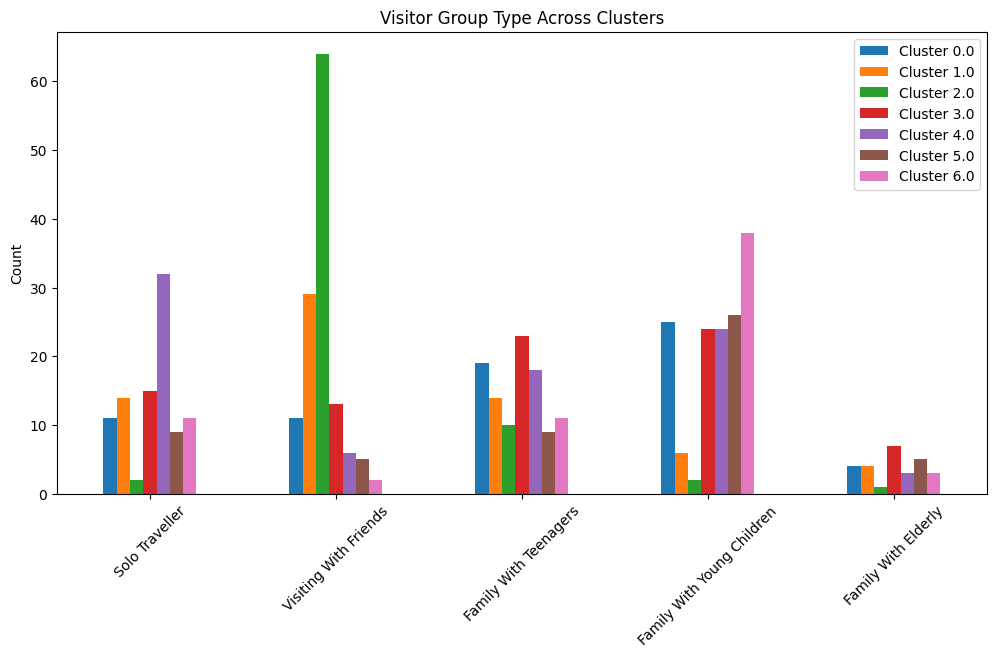

In [16]:
plot_data = plot_bar_per_cluster(data, 'q1')

plot_data.plot(kind = 'bar', figsize = (12,6))
plt.title("Visitor Group Type Across Clusters")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '13 To 20 Years Old'),
  Text(1, 0, '21 To 34 Years Old'),
  Text(2, 0, 'Below 12 Years Old'),
  Text(3, 0, '35 To 49 Years Old'),
  Text(4, 0, '50 To 64 Years Old'),
  Text(5, 0, '65 Years Old And Above')])

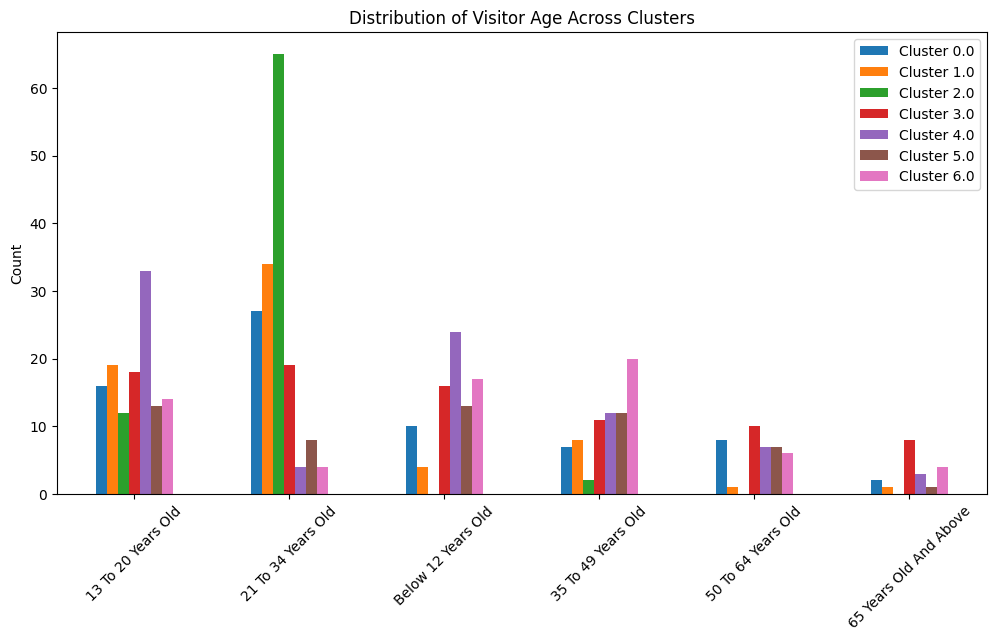

In [17]:
plot_data = plot_bar_per_cluster(data, 'q2_1')

plot_data.plot(kind = 'bar', figsize = (12,6))
plt.title("Distribution of Visitor Age Across Clusters")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Spontaneous Exploration'),
  Text(1, 0, 'Following Shortest Queue'),
  Text(2, 0, 'Pre-Planned Route'),
  Text(3, 0, 'Mix of pre-planning and spontaneous exploration')])

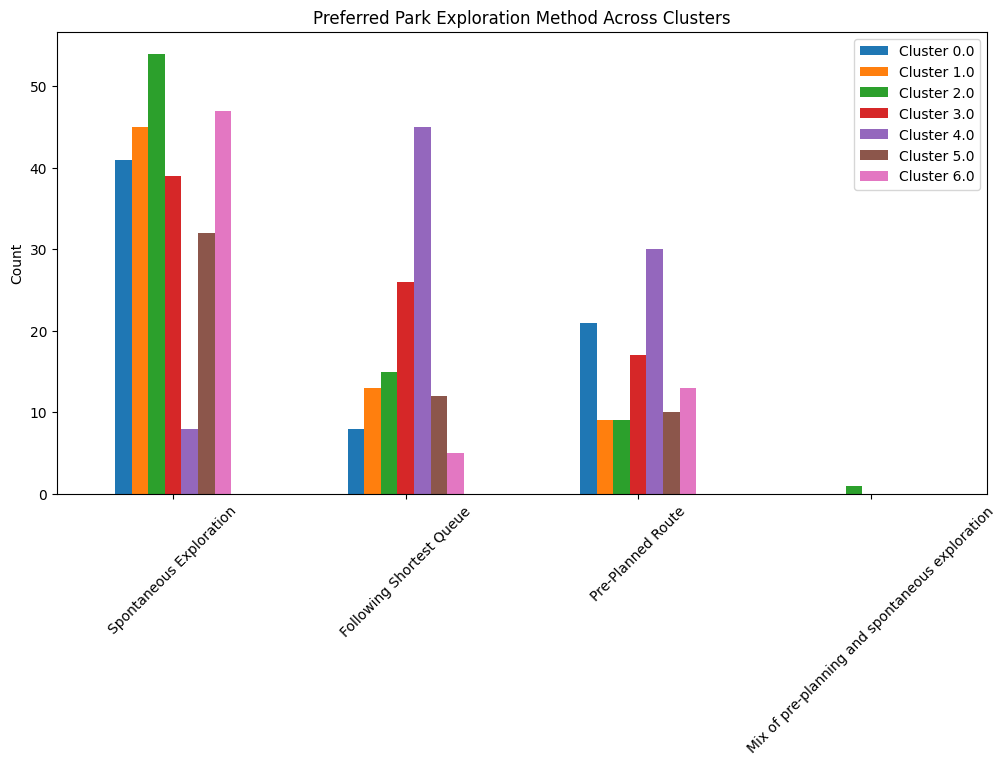

In [18]:
plot_data = plot_bar_per_cluster(data, 'q12')

plot_data.plot(kind = 'bar', figsize = (12,6))
plt.title("Preferred Park Exploration Method Across Clusters")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation = 45)

# **Heatmaps**
### To assess the degree to which various factors are prevalent in each cluster, we will visualise their relative frequencies using heatmaps.

In [19]:
def plot_multiselect_heatmap(df, question, cluster_col='cluster'):
    all_options = set()
    df[question].str.split(',').apply(lambda x: all_options.update([i.strip() for i in x if isinstance(i, str)]))
    all_options = sorted(all_options)


    clusters = sorted(df[cluster_col].dropna().unique())
    heatmap_data = pd.DataFrame(0.0, index=clusters, columns=all_options, dtype=float)

    for cluster in clusters:
        cluster_df = df[df[cluster_col] == cluster]
        total = len(cluster_df)

        exploded = cluster_df[question].str.split(',').explode().str.strip()
        option_counts = exploded.value_counts()

        for option in all_options:
            percent = (option_counts.get(option, 0) / total) * 100 if total > 0 else 0
            heatmap_data.loc[cluster, option] = round(percent, 2)

    return heatmap_data

Some options in q6 have commas in them. Since we are using commas to split the selected options, this would lead to incorrect splitting of multi-word options. Hence, we should first clean the data before creating the heatmap.

In [20]:
def clean_q6(response):
    options = [opt.strip().title() for opt in response.split(',')]
    cleaned = []

    for opt in options:
        if opt == "Other Rides (Teacup Ride":
            cleaned.append("Other rides")
        elif opt == "Carousel Rides)" or opt == "Suspended Coasters":
          continue
        else:
            cleaned.append(opt)

    return ', '.join(cleaned)

# Apply cleaning to q6 column
data['q6'] = data['q6'].apply(clean_q6)

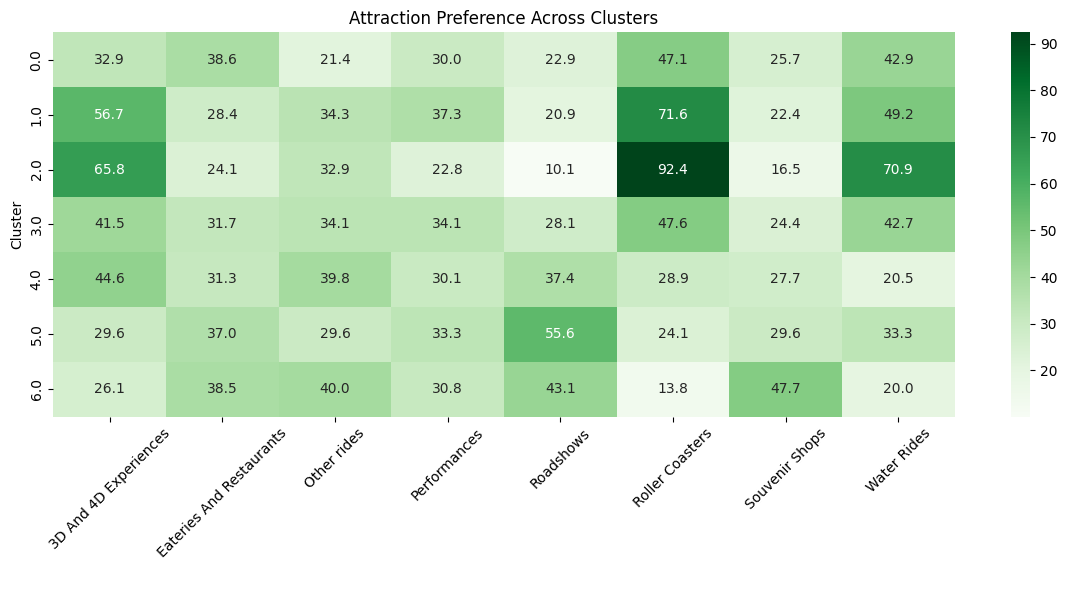

In [21]:
q6_heatmap_data = plot_multiselect_heatmap(data, question='q6')

plt.figure(figsize=(12, 6))
sns.heatmap(q6_heatmap_data.astype(float), annot=True, cmap = "Greens", fmt= ".1f")
plt.title("Attraction Preference Across Clusters")
plt.xlabel(" ")
plt.xticks(rotation=45)
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

Similarly for q7, there are inconsistencies in the options selected. Therefore, we need to clean the data before creating the heatmap.

In [22]:
def clean_q7(response):
    options = [opt.strip().title() for opt in response.split(',')]
    cleaned = []

    for opt in options:
        if opt == "Thrill Factor (Not To Be Confused With Scare Factor)" or opt == "Aesthetics":
            continue
        elif opt == "Holiday Seasons" or opt == "Holiday seasons":
            cleaned.append("Holiday Seasons")
        elif opt == "Weather Conditions" or opt == "Weather conditions":
            cleaned.append("Weather Condition")
        else:
            cleaned.append(opt)

    return ', '.join(cleaned)

# Apply cleaning to q7 column
data['q7'] = data['q7'].apply(clean_q7)

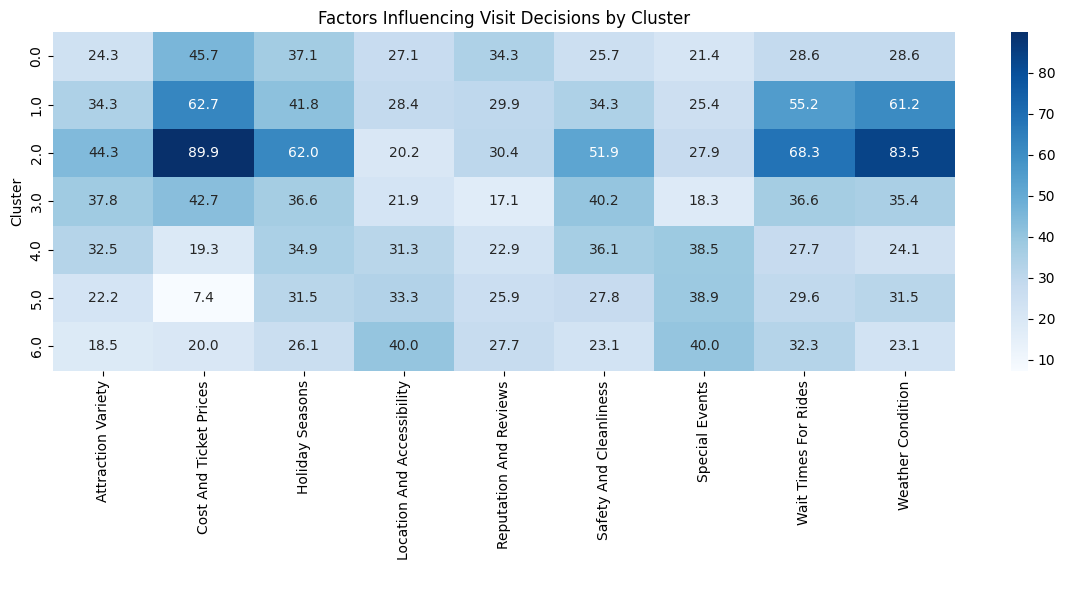

In [23]:
q7_heatmap_data = plot_multiselect_heatmap(data, question='q7')

plt.figure(figsize=(12, 6))
sns.heatmap(q7_heatmap_data.astype(float), annot=True, cmap = "Blues", fmt= ".1f")
plt.title("Factors Influencing Visit Decisions by Cluster")
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

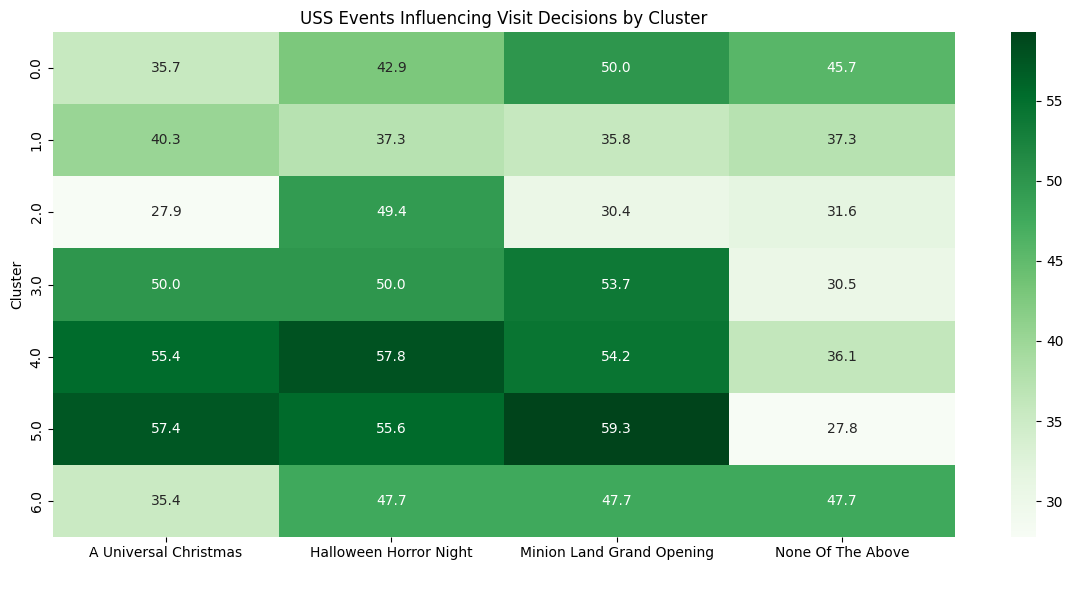

In [24]:
q8_heatmap_data = plot_multiselect_heatmap(data, question='q8')

plt.figure(figsize=(12, 6))
sns.heatmap(q8_heatmap_data.astype(float), annot=True, cmap = "Greens", fmt= ".1f")
plt.title("USS Events Influencing Visit Decisions by Cluster")
plt.xlabel(" ")
plt.xticks(rotation=0)
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [25]:
def clean_q10(response):
    options = [opt.strip().title() for opt in response.split(',')]
    cleaned = []

    for opt in options:
        if opt == "Special Events (Halloween":
            cleaned.append("Special events")
        elif opt in ["Special Events (Christmas Etc.)", "Christmas Etc.)", "Weather Conditions", "Summer Festival"]:
          continue
        else:
            cleaned.append(opt)

    return ', '.join(cleaned)

# Apply cleaning to q10 column
data['q10'] = data['q10'].apply(clean_q10)

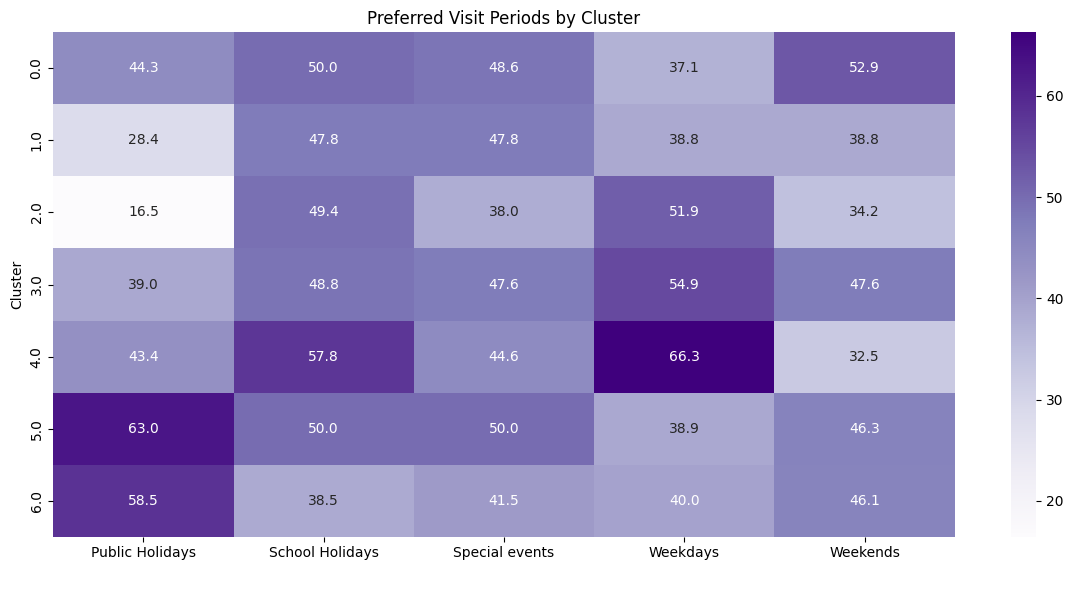

In [26]:
q10_heatmap_data = plot_multiselect_heatmap(data, question='q10')

plt.figure(figsize=(12, 6))
sns.heatmap(q10_heatmap_data.astype(float), annot=True, cmap = "Purples", fmt= ".1f")
plt.title("Preferred Visit Periods by Cluster")
plt.xlabel(" ")
plt.xticks(rotation=0)
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()